### Pre-processing of model data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from astropy.table import Table
from astropy.io import ascii
import os
homedir = os.path.expanduser('~')
datadir = f"{homedir}/uoedrive/data/BTSettlModels/015-5.0s/bestfits/"

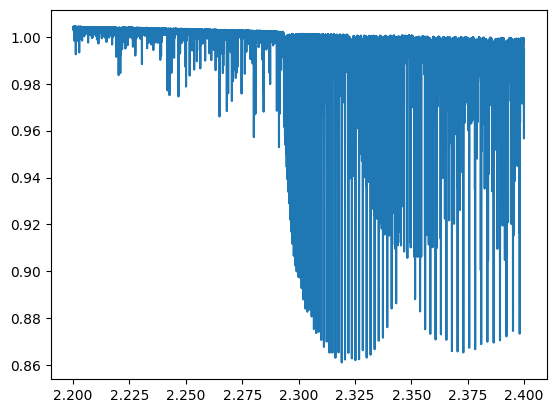

In [14]:
with open(datadir+"lte015-5.0-CIFIST2011.spec") as f:
    data = f.readlines()
model = [line.split()[0:2] for line in data]
model_C2011 = np.array([[line[0], line[1].replace("D", "E")] for line in model], dtype=float)
tind = (model_C2011[:,0] > 22000) * (model_C2011[:,0] < 24000)
model_C2011 = model_C2011[tind,:]
model_C2011[:,0] /= 10000
model_C2011 = model_C2011[model_C2011[:, 0].argsort()] # sort along wl
model_C2011[:,1] /= np.median(model_C2011[:,1])
plt.plot(model_C2011[:,0], model_C2011[:,1])

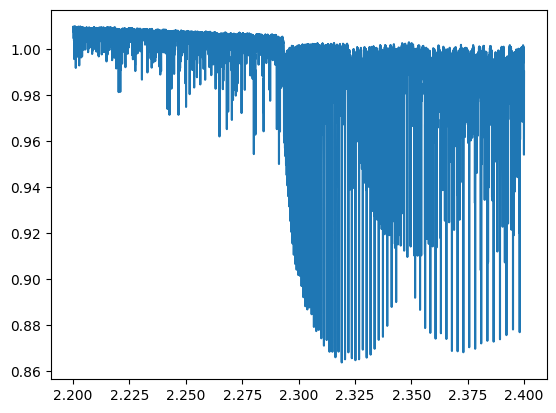

In [15]:
with open(datadir+"lte015-5.0-AGSS2009.spec") as f:
    data = f.readlines()
model = [line.split()[0:2] for line in data]
model = np.array([[line[0], line[1].replace("D", "E")] for line in model], dtype=float)
tind = (model[:,0] > 22000) * (model[:,0] < 24000)
model = model[tind,:]
model[:,0] /= 10000
model = model[model[:, 0].argsort()] # sort along wl
model[:,1] /= np.median(model[:,1])
model_A = np.array([model[:,0], model[:,1]]).T
plt.plot(model_A[:,0], model_A[:,1])

12.0057


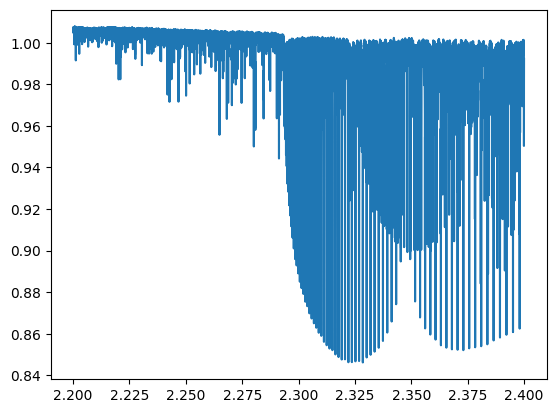

In [16]:
with open(datadir+"lte015.0-5.0-CIFIST2011_2015.spec") as f:
    data = f.readlines()
model = [line.split()[0:2] for line in data]
model = np.array([[line[0], line[1].replace("D", "E")] for line in model], dtype=float)
tind = (model[:,0] > 22000) * (model[:,0] < 24000)
model = model[tind,:]
model[:,0] /= 10000
model = model[model[:, 0].argsort()] # sort along wl
#model[:,1] = np.log10(model[:,1])+8 # column2: 10**(F_lam + DF) to convert to Ergs/sec/cm**2/A
print(np.median(model[:,1]))
model[:,1] /= np.median(model[:,1])
model_C15 = np.array([model[:,0], model[:,1]]).T
plt.plot(model_C15[:,0], model_C15[:,1])

In [79]:
with open(datadir+"lte015-5.0-CIFIST2011c.spec") as f:
    data = f.readlines()
data[0]

'       1.0000 -8.85870D+01 -8.85870D+01 110 145    576.0051 1000 250    844.9407    7 250      0.0000    0 251  1000  5.760051D+02 -3.299000D+00  1.240001D-04     7  8.449407D+02 -3.687600D+00  1.240001D-04  37  39  5.21721D+06  5.10994D+06\n'

12.0057


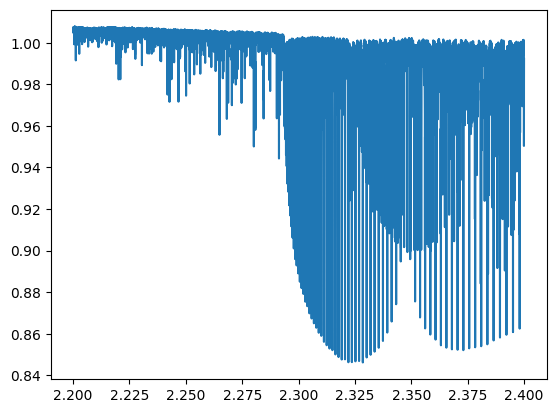

In [17]:
with open(datadir+"lte015-5.0-CIFIST2011c.spec") as f:
    data = f.readlines()
model = [line.split()[0:2] for line in data]
model = np.array([[line[0], line[1].replace("D", "E")] for line in model], dtype=float)
tind = (model[:,0] > 22000) * (model[:,0] < 24000)
model = model[tind,:]
model[:,0] /= 10000
model = model[model[:, 0].argsort()] # sort along wl
#model[:,1] = np.log10(model[:,1])+8 # column2: 10**(F_lam + DF) to convert to Ergs/sec/cm**2/A
print(np.median(model[:,1]))
model[:,1] /= np.median(model[:,1])
model_C2011c = np.array([model[:,0], model[:,1]]).T
plt.plot(model_C2011c[:,0], model_C2011c[:,1])

In [19]:
with fits.open(datadir+"lte015.0-5.0-C2015fits.fits") as hdul:
    data = hdul[1].data
model = np.array(data.tolist())

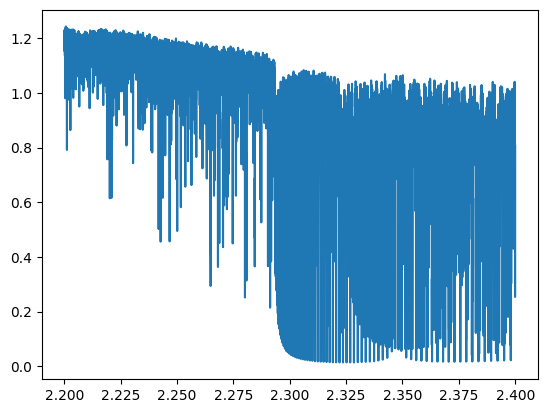

In [20]:
tind = (model[:,0] > 2.2) * (model[:,0] < 2.4)
model = model[tind,:]
model = model[model[:, 0].argsort()] # sort along wl
model[:,1] /= np.median(model[:,1])
model_C2015fits = np.array([model[:,0], model[:,1]]).T
plt.plot(model_C2015fits[:,0], model_C2015fits[:,1])

#### Compare fluxes

In [21]:
# irononly
model_ironly = fits.getdata(datadir+"lte015-5.0-ironly.fits")
model_ironly = np.array(model_ironly.tolist())
model_ironly[:,0] /= 10000
tind = (model_ironly[:,0] > 2.20) * (model_ironly[:,0] < 2.40)
model_ironly = model_ironly[tind,:]
model_ironly[:,1] /= np.median(model_ironly[:,1]) # normalize
model_ironly

array([[2.20015   , 1.29867276],
       [2.2004    , 1.37879539],
       [2.20065   , 1.18713498],
       ...,
       [2.39934   , 0.83272201],
       [2.39959   , 0.90677558],
       [2.39984   , 0.70876081]])

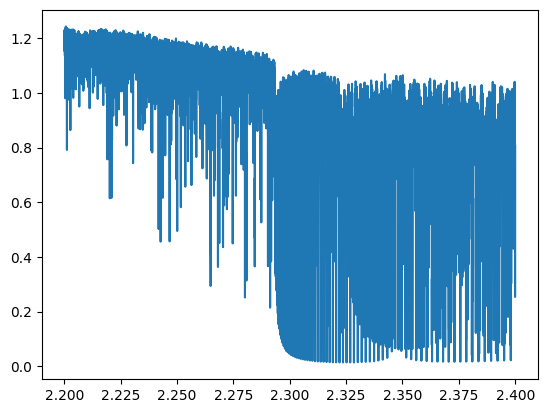

In [22]:
# orig
model_orig = fits.getdata(datadir+"lte015-5.0-orig.fits")
model_orig = np.array(model_orig.tolist())
#model_orig[:,0] /= 10000
tind = (model_orig[:,0] > 2.20) * (model_orig[:,0] < 2.40)
model_orig = model_orig[tind,:]
model_orig[:,1] /= np.median(model_orig[:,1]) # normalize
plt.plot(model_orig[:,0], model_orig[:,1])

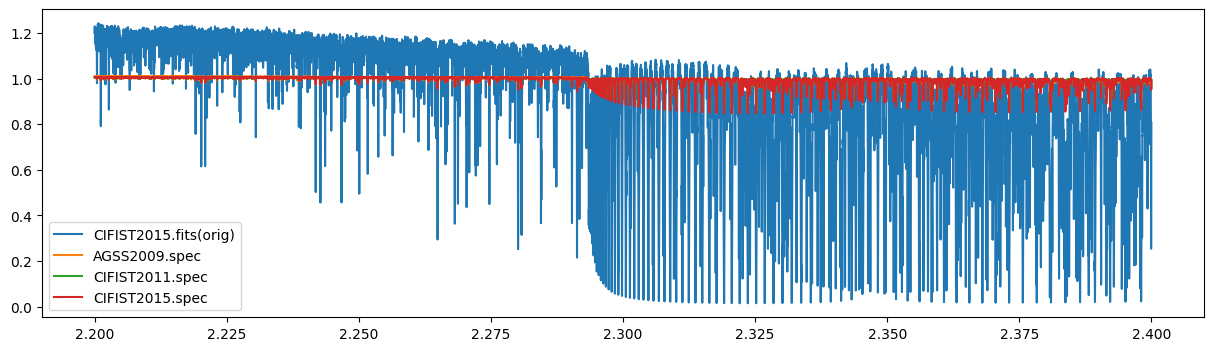

In [36]:
plt.figure(figsize=(15,4))
#plt.plot(model_orig[:,0], model_orig[:,1], label="orig")
#plt.plot(model_ironly[:,0], model_ironly[:,1], label="iron only")
plt.plot(model_C2015fits[:,0], model_C2015fits[:,1], label="CIFIST2015.fits(orig)")
plt.plot(model_A[:,0], model_A[:,1], label="AGSS2009.spec")
plt.plot(model_C2011[:,0],model_C2011[:,1], label="CIFIST2011.spec")
plt.plot(model_C15[:,0], model_C15[:,1], label="CIFIST2015.spec")
plt.legend()

### Cut all and save

In [93]:
for file in glob.glob(f"{datadir}/lte*.spec"):
    filename=file.split("/")[-1][:-5]
    print(filename)
    with open(file) as f:
        data = f.readlines()
    model = [line.split()[0:3] for line in data]
    m = np.array([[line[0], line[1].replace("D", "E")] for line in model], dtype=float)
    tind = (m[:,0] > 22000) * (m[:,0] < 24000)  # cut only the useful wls
    m = m[tind,:]
    m[:,0] /= 10000  # convert to microns
    m = m[m[:, 0].argsort()]  # sort along wl

    c1 = fits.Column(name='wavelength (um)', array=m[:,0], format="E")
    c2 = fits.Column(name='flux (Ergs/sec/cm**2/A)', array=m[:,1], format="E")
    t = fits.BinTableHDU.from_columns([c1, c2])
    savename = f"{datadir}/bestfits/{filename}.fits"
    t.writeto(savename)

lte015.0-5.0-CIFIST2011_2015


OSError: File /Users/spacegrey/uoedrive/data/BT-SettlModels/015-5.0s//lte015.0-5.0-CIFIST2011_2015.fits already exists. If you mean to replace it then use the argument "overwrite=True".